<a href="https://colab.research.google.com/github/lelyta30/PCVK_GENAP_2023/blob/main/Final_Project_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Name : Lelyta Salsabila

Class : 3I

NIM : 1941720026

**About**

In this project, I used Hybrid deep CNN transfer learning on rice plant images, classifying and identifying various rice diseases. I used Transfer Learning to generate our deep learning model using the Rice Leaf Dataset from a secondary source. The proposed model is 90.8% accurate.


In [3]:
#untuk connect ke gdrive
## Mounting Google Drive
from google.colab import drive, files 
drive.mount('/content/drive')
from __future__ import absolute_import, print_function,division, unicode_literals # impor absolut dengan Python
import os.path #mengimplementasikan beberapa fungsi berguna pada nama path
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

import numpy as np
import matplotlib.pyplot as plt
import pathlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [5]:
data_dir ="/content/drive/MyDrive/PCVK/Rice Leaf Disease"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Bacterial leaf blight','Brown spot','Leaf smut'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Bacterial leaf blight' 'Brown spot' 'Leaf smut']


In [6]:
train_path = '/content/drive/MyDrive/PCVK/Rice Leaf Disease'
test_path = '/content/drive/MyDrive/PCVK/Rice Leaf Disease'

In [7]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [8]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

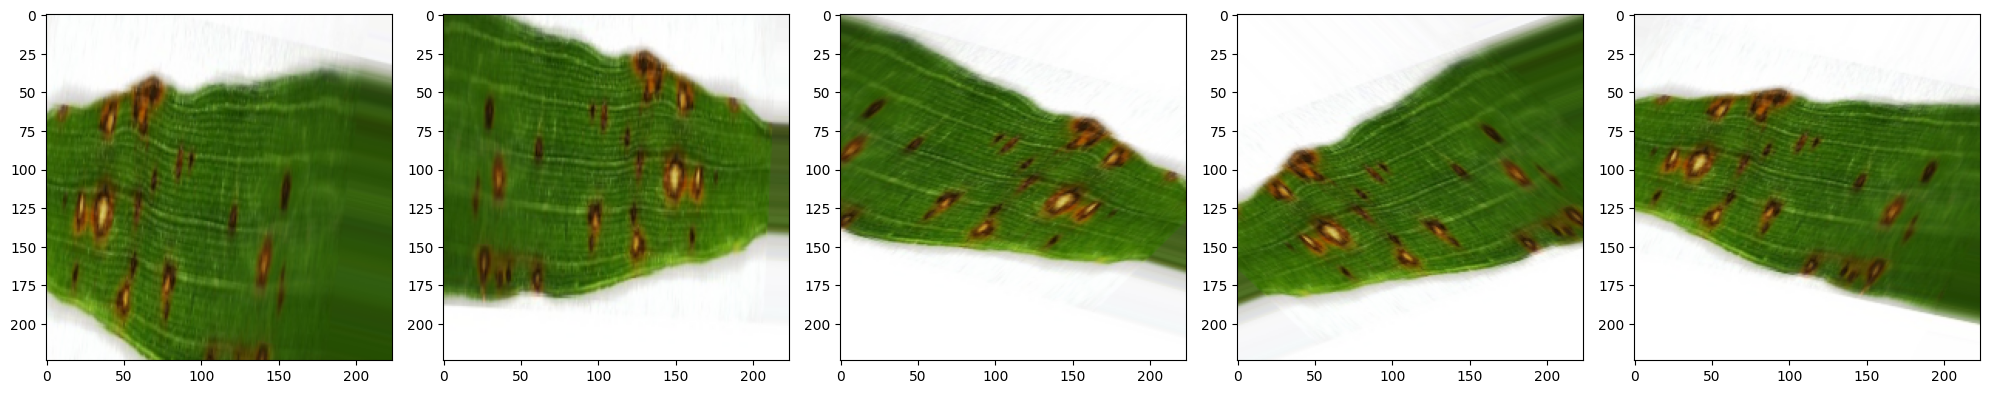

In [9]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

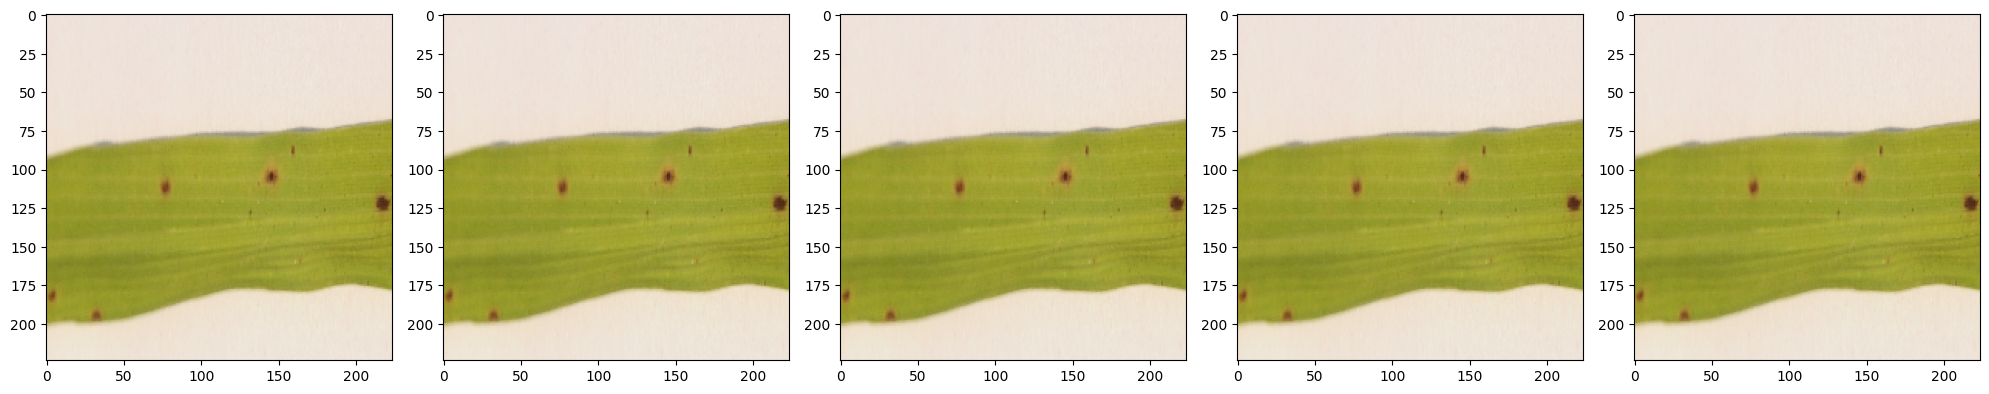

In [10]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [11]:
# Model building
#Instatiating A convnet

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [12]:
EPOCHS=70
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

<ipython-input-12-7786d5f387fe>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)


Epoch 1/70
15/15 [==============================] - 41s 3s/step - loss: 1.8254 - accuracy: 0.4167 - val_loss: 1.1933 - val_accuracy: 0.3333
Epoch 2/70
15/15 [==============================] - 23s 2s/step - loss: 1.0867 - accuracy: 0.4417 - val_loss: 0.9767 - val_accuracy: 0.6333
Epoch 3/70
15/15 [==============================] - 23s 2s/step - loss: 0.9676 - accuracy: 0.5000 - val_loss: 0.8750 - val_accuracy: 0.6833
Epoch 4/70
15/15 [==============================] - 21s 1s/step - loss: 0.8437 - accuracy: 0.6417 - val_loss: 0.8490 - val_accuracy: 0.6667
Epoch 5/70
15/15 [==============================] - 22s 1s/step - loss: 1.0003 - accuracy: 0.5833 - val_loss: 0.8593 - val_accuracy: 0.6417
Epoch 6/70
15/15 [==============================] - 23s 2s/step - loss: 0.9144 - accuracy: 0.5500 - val_loss: 0.8104 - val_accuracy: 0.6333
Epoch 7/70
15/15 [==============================] - 23s 2s/step - loss: 0.9230 - accuracy: 0.5750 - val_loss: 0.7824 - val_accuracy: 0.7417
Epoch 8/70
15/15 [==

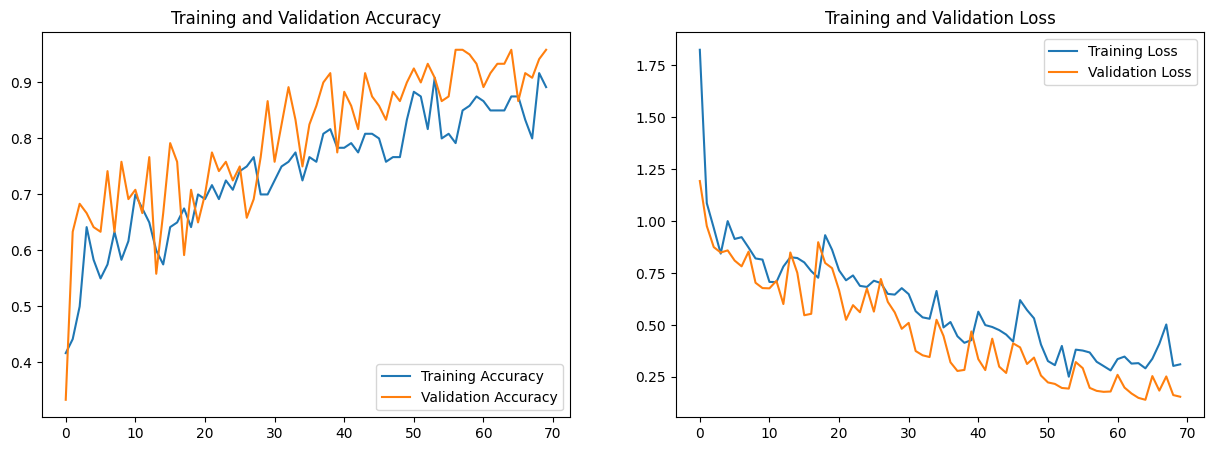

In [13]:
# Plot training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()